In [15]:
import copy
import sys
sys.path.insert(0, "..")
import numpy as np
import matplotlib.pyplot as plt
from classes.calculators.lennardjones import LennardJones
from classes.regression.regressers import Ridge_Regression, RBF_kernel_regressor, Pol_Regression

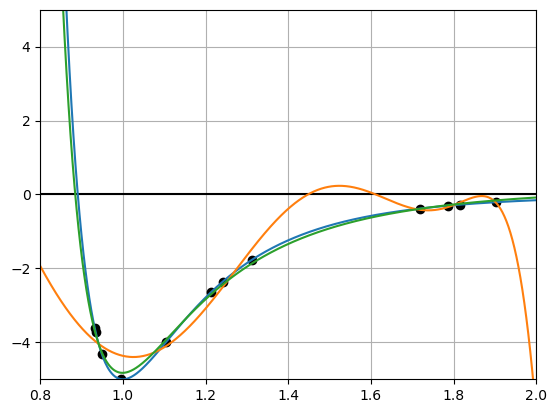

In [23]:
fig, ax = plt.subplots()
ax.axhline(0, c="k")
ax.grid()
ax.set_xlim([0.8, 2.0])
ax.set_ylim([-5,5])
pot = LennardJones()
rand1 = np.random.rand(4)*(1.0-0.85) + 0.85
rand2 = np.random.rand(8)*(2.0-1.0) + 1.0
r_dat = np.concatenate((rand1, rand2))
y_dat = pot._V(r=r_dat)
ax.plot(r_dat, y_dat, 'o', c='k')

data = np.zeros(shape=(len(r_dat),2))
data[:,0] = r_dat
data[:,1] = y_dat
pols = []
pol_orders = [0] + [-2.0*(i+1) for i in range(6)]
xs = np.linspace(0.8, 2.0, 1000)
pols = [pol_orders, [0] + [(i+1) for i in range(12)], [0] + [-(i+1) for i in range(12)]]
lambs = [0.0, 1e-4, 1e-2]
for lamb, pol in zip(lambs, pols):
    ridge_reg = Ridge_Regression(data=data, N_degs=pol, lamb=lamb)
    ys = ridge_reg.sample(x_data=xs)
    ax.plot(xs, ys)

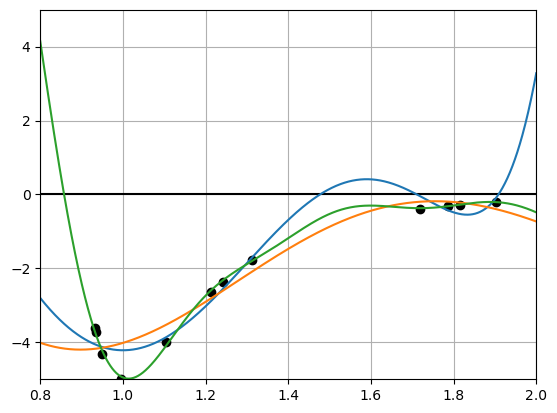

In [24]:
fig, ax = plt.subplots()
ax.axhline(0, c="k")
ax.grid()
ax.set_xlim([0.8, 2.0])
ax.set_ylim([-5,5])
ax.plot(r_dat, y_dat, 'o', c='k')
pol_ker = Ridge_Regression(data=data, N_degs=8, lamb=1e-4)
ys = pol_ker.sample(x_data=xs)
ax.plot(xs, ys)

sigmas = [1.0, 0.25]
for sigma in sigmas:
    rbf_reg = RBF_kernel_regressor(x_data=r_dat, y_data=y_dat, lamb=1e-4, sigma=sigma)
    ys = rbf_reg.sample(x_data=xs)
    ax.plot(xs, ys)